<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

register(id='FrozenLake-v3', entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name': '4x4', 'is_slippery':False})

env = gym.make('FrozenLake-v3')

In [2]:
#초기화
Q = np.zeros([env.observation_space.n, env.action_space.n])

num_episodes = 2000

rList=[]


In [3]:
dis = 0.98
for i in range(num_episodes):
    state = env.reset()
    rAll=0
    done = False
    #E-greedy 방법
    e = 1./((i/100) + 1)
    
    while not done:
        # random 하게 감
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = rargmax(Q[state, :])
        
        new_state, reward, done, _ = env.step(action)
        # Q = R + Q
        Q[state, action] = reward + dis * np.max(Q[new_state, :]) 
        # Q = R + discount*Q
        
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)
    

Success rate:0.803
Final Q-table values
[[0.88584238 0.9039208  0.9039208  0.88584238]
 [0.88584238 0.         0.92236816 0.9039208 ]
 [0.9039208  0.941192   0.9039208  0.92236816]
 [0.92236816 0.         0.9039208  0.9039208 ]
 [0.9039208  0.92236816 0.         0.88584238]
 [0.         0.         0.         0.        ]
 [0.         0.9604     0.         0.92236816]
 [0.         0.         0.         0.        ]
 [0.92236816 0.         0.941192   0.9039208 ]
 [0.92236816 0.9604     0.9604     0.        ]
 [0.941192   0.98       0.         0.941192  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9604     0.98       0.941192  ]
 [0.9604     0.98       1.         0.9604    ]
 [0.         0.         0.         0.        ]]


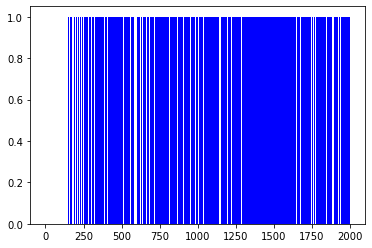

In [4]:
print("Success rate:" + str(sum(rList) / num_episodes))
print("Final Q-table values")
print(Q)

plt.bar(range(len(rList)), rList, color='b', width=1)
plt.show()